In [1]:
import pandas as pd
import numpy as np

In [2]:
anime_df = pd.read_csv('data/raw/animes.csv')
review_df = pd.read_csv('data/raw/reviews.csv')

In [3]:
# remove duplicate rows in the dataframes
anime_df.drop_duplicates(subset='uid', inplace=True)
review_df.drop_duplicates(inplace=True)

In [4]:
allowed_scores = [x+1 for x in range(10)]

In [8]:
# remove reviews with invalid score 
review_df = review_df[review_df['score'].isin(allowed_scores)]

In [9]:
review_df['score'].unique()

array([ 8, 10,  7,  9,  6,  4,  5,  2,  1,  3])

In [10]:
# reviews_df.hist(column='score')

NameError: name 'reviews_df' is not defined

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

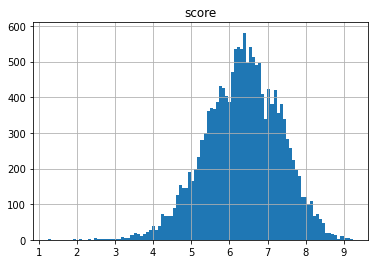

In [11]:
anime_df.hist(column='score', bins=100)

In [99]:
anime_df.sort_values(by='popularity').head(5)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
740,1535,Death Note,"A shinigami, as a god of death, can kill any p...","['Mystery', 'Police', 'Psychological', 'Supern...","Oct 4, 2006 to Jun 27, 2007",37.0,1871043,1,52.0,8.65,https://cdn.myanimelist.net/images/anime/9/945...,https://myanimelist.net/anime/1535/Death_Note
681,16498,Shingeki no Kyojin,"Centuries ago, mankind was slaughtered to near...","['Action', 'Military', 'Mystery', 'Super Power...","Apr 7, 2013 to Sep 29, 2013",25.0,1754979,2,111.0,8.47,https://cdn.myanimelist.net/images/anime/10/47...,https://myanimelist.net/anime/16498/Shingeki_n...
8409,11757,Sword Art Online,"In the year 2022, virtual reality has progress...","['Action', 'Adventure', 'Fantasy', 'Game', 'Ro...","Jul 8, 2012 to Dec 23, 2012",25.0,1657823,3,1771.0,7.49,https://cdn.myanimelist.net/images/anime/11/39...,https://myanimelist.net/anime/11757/Sword_Art_...
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
16,30276,One Punch Man,The seemingly ordinary and unimpressive Saitam...,"['Action', 'Sci-Fi', 'Comedy', 'Parody', 'Supe...","Oct 5, 2015 to Dec 21, 2015",12.0,1475219,5,50.0,8.68,https://cdn.myanimelist.net/images/anime/12/76...,https://myanimelist.net/anime/30276/One_Punch_Man


In [97]:
len(review_df)

130517

In [12]:
review_df.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [15]:
def filter_anime(n_anime, n_users):
    anime_df_new = anime_df.sort_values(by='popularity')[:n_anime]
    anime_ids = anime_df_new['uid'].unique()
    
    review_df_new = review_df[review_df['anime_uid'].isin(anime_ids)]
    
    best_users = review_df['profile'].value_counts().index.to_list()[:n_users]
    review_df_new = review_df_new[review_df_new['profile'].isin(best_users)]
    
    # calculate sparcity
    sparcity = 1 - len(review_df_new) / (len(anime_df_new) * len(review_df_new['profile'].unique()))
    print(sparcity)
    
    return anime_df_new, review_df_new


In [16]:
anime_df_new, review_df_new = filter_anime(1000, 2000)

0.9856104887983707


In [122]:
len(anime_df_new)

2000

In [123]:
len(review_df_new)

47628

In [124]:
len(review_df_new['profile'].unique())

3937

['Sidewinder51',
 'Stark700',
 'ktulu007',
 'LegendAqua',
 'ggultra2764',
 'literaturenerd',
 'PyraXadon',
 'BanjoTheBear',
 'angelsreview',
 'Karhu',
 'Eoussama',
 'BabyGirl06301',
 'Zaku88',
 'Archaeon',
 'kajia',
 'Tyrannicswine117',
 'CodeBlazeFate',
 'matthigh',
 'KANLen09',
 'mouthpiece',
 'BowlingJD',
 'ratchet573',
 'HybridMedia',
 'Nasty001',
 'AnimeFan48',
 'jc9622',
 'Skadi',
 'lawlmartz',
 'Hectotane',
 'mrsKWON',
 'FullmetalCowboy',
 'Fear_the_Reefer',
 'DesolatePsyche',
 'SupremeLord',
 'Flawfinder',
 'HaXXspetten',
 'GrayRealm',
 'TakamakiJoker',
 'EggheadLuna',
 'Master10K',
 'LeaOotori',
 'Luquillo',
 'ZephSilver',
 'mercury1980',
 'Shura-shurato',
 'camay1997',
 'ParaParaJMo',
 'Krunchyman',
 'Simonian',
 'TrashDax',
 'Ranivus',
 'Veronin',
 'Shingster',
 'papsoshea',
 'SovietWeeb',
 'mistah-manila',
 'FAKEANIMEGIRL',
 'Gonzo-lewd',
 'Firechick12012',
 'LaLeLuLiLo',
 'Injenss',
 'AnimeBW',
 'ImRingo',
 'Retro8bit',
 'earl_of_sandvich',
 'Nicholaevich',
 'jet2r0cks',
 